<a href="https://colab.research.google.com/github/pyGuru123/Data-Analysis-and-Visualization/blob/main/Tracking%20Bird%20Migration/bird_migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One fascinating area of research uses GPS to track movements of animals. It is now possible to manufacture a small GPS device that is solar charged, so you don’t need to change batteries and use it to track flight patterns of birds.

The data for this case study comes from the LifeWatch INBO project. Several data sets have been released as part of this project. We will use a small data set that consists of migration data for three gulls named Eric, Nico, and Sanne

![gulls](https://i.pinimg.com/originals/b7/42/e7/b742e701845c98fd671ab1d76168d0bd.jpg)


**Aim** : Track the movement of three gulls namely – Eric, Nico & Sanne

**Dataset** : [official_datasets](https://inbo.carto.com/u/lifewatch/datasets) ; used dataset – [csv](https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/c72498a54a4513c2eb4ec005adc0010c/asset-v1:HarvardX+PH526x+3T2016+type@asset+block/bird_tracking.csv)

**Dependencies** : Matplotlib, Pandas, Numpy, Cartopy, Shapely

The csv file contains eight columns and includes variables like latitude, longitude, altitude, and time stamps. In this case study, we will first load the data, visualize some simple flight trajectories, track flight speed, learn about daytime and much, much more.

The case study is divied into five parts:
1. Visualizing longitude and latitude data of the gulls.
2. Visualize the variation of the speed of the gulls.
3. Visualize the time required by the gulls to cover equal distances over the journey.
4. Visualize the daily mean speed of the gulls.
5. Cartographic view of the journey of the gulls.

Importing required libraries

In [64]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Installing Cartopy in colab

In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Installing shapely in colab

In [ ]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

# Downloading and reading dataset

Downloading dataset

In [67]:
url = 'https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/c72498a54a4513c2eb4ec005adc0010c/asset-v1:HarvardX+PH526x+3T2016+type@asset+block/bird_tracking.csv'

response = requests.get(url)
data = response.content
with open('bird_track.csv', 'wb') as file:
    file.write(data)

Reading csv data

In [68]:
df = pd.read_csv('bird_track.csv')
df.info

<bound method DataFrame.info of        altitude               date_time  ...  speed_2d  bird_name
0            71  2013-08-15 00:18:08+00  ...  0.150000       Eric
1            68  2013-08-15 00:48:07+00  ...  2.438360       Eric
2            68  2013-08-15 01:17:58+00  ...  0.596657       Eric
3            73  2013-08-15 01:47:51+00  ...  0.310161       Eric
4            69  2013-08-15 02:17:42+00  ...  0.193132       Eric
...         ...                     ...  ...       ...        ...
61915        11  2014-04-30 22:00:08+00  ...  0.208087      Sanne
61916         6  2014-04-30 22:29:57+00  ...  1.522662      Sanne
61917         5  2014-04-30 22:59:52+00  ...  3.120545      Sanne
61918        16  2014-04-30 23:29:43+00  ...  0.592115      Sanne
61919         9  2014-04-30 23:59:34+00  ...  0.485489      Sanne

[61920 rows x 8 columns]>

printing dataframe

In [69]:
df

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


Getting bird names

In [70]:
bird_names = pd.unique(df.bird_name)
print(bird_names)

['Eric' 'Nico' 'Sanne']


Number of row entries of each bird

In [71]:
for bird_name in bird_names:
    print(bird_name, len(df.bird_name[df.bird_name == bird_name]))

Eric 19795
Nico 21121
Sanne 21004


# Visualizing longitude and latitude data of the gulls

Visulization of location for bird Eric

<Figure size 800x600 with 0 Axes>

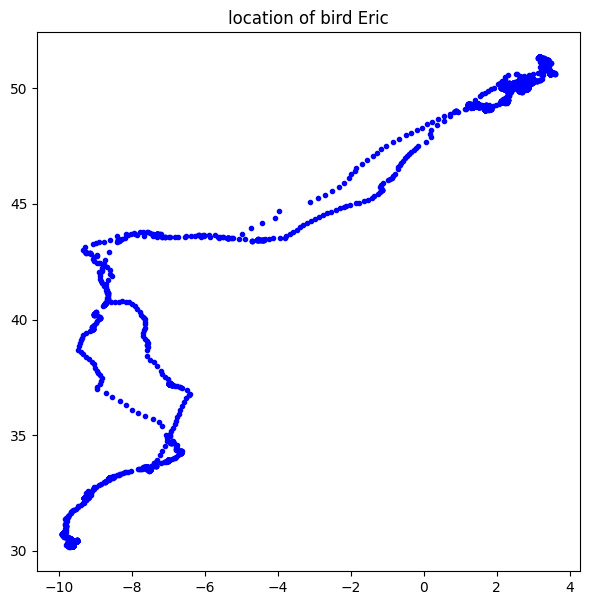

In [72]:
plt.figure(figsize=(8,6))
ix = df.bird_name == 'Eric'
x, y = df.longitude[ix], df.latitude[ix]
plt.figure(figsize = (7,7))
plt.plot(x,y, 'b.')
plt.title('location of bird Eric')
plt.show()

Visulization of all three birds as subplots

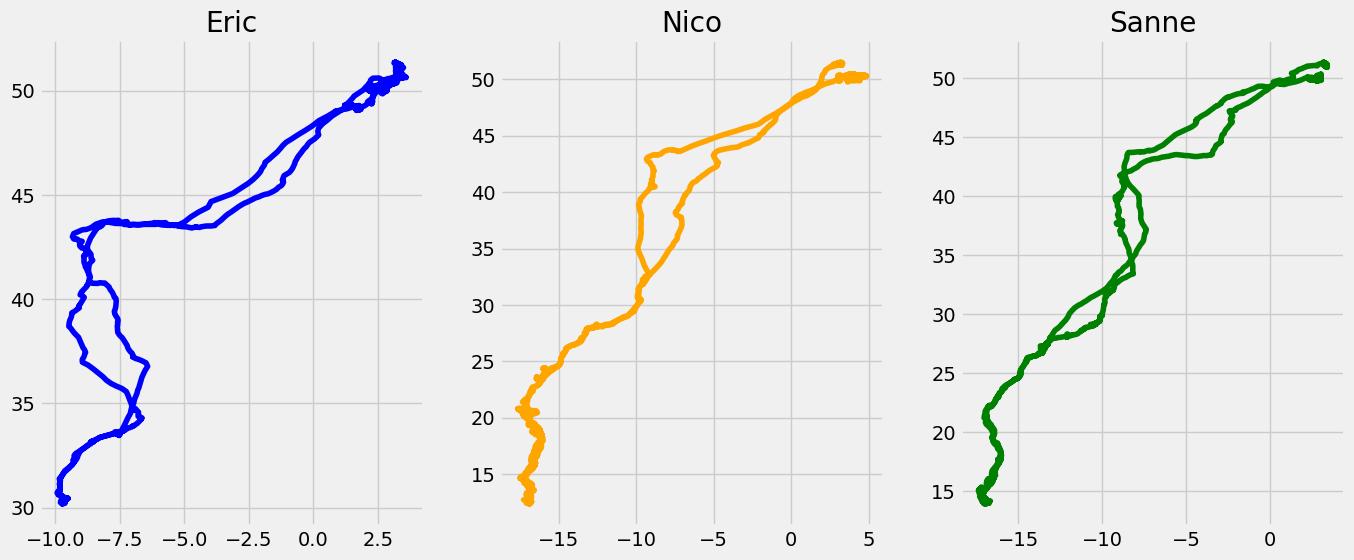

In [73]:
plt.style.use('fivethirtyeight')
colors = ['blue', 'orange', 'green']
fig, subplot = plt.subplots(1, 3, figsize=(15,6))
for index, bird_name in enumerate(bird_names):
    ix = df.bird_name == bird_name
    x, y = df.longitude[ix], df.latitude[ix]
    subplot[index].plot(x,y, colors[index] )
    subplot[index].title.set_text(bird_name)
plt.show()

Visualization of all three birds in 1 plot

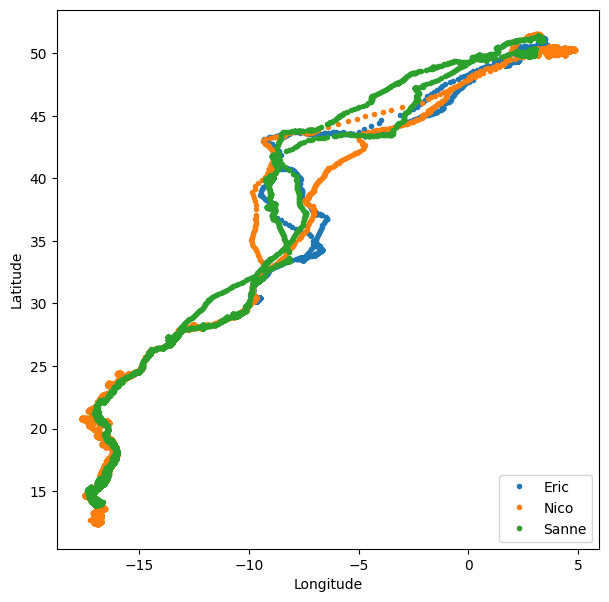

In [74]:
plt.style.use('default')
plt.figure(figsize = (7,7))
for bird_name in bird_names:
    ix = df.bird_name == bird_name
    x, y = df.longitude[ix], df.latitude[ix]
    plt.plot(x,y , '.', label=bird_name)
plt.xlabel("Longitude") 
plt.ylabel("Latitude") 
plt.legend(loc="lower right") 
plt.show()

# Visualize the variation of the speed of the gulls

We are going to visualize 2D speed vs Frequency for the gull named “Sanne”

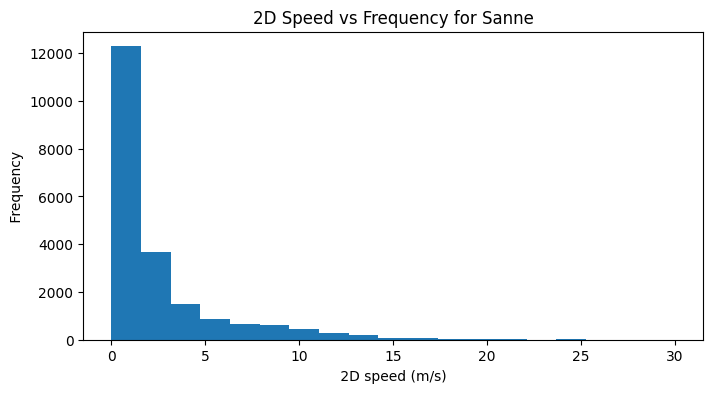

In [75]:
ix = df.bird_name == 'Sanne'
speed = df.speed_2d[ix]

plt.figure(figsize = (8,4))
ind = np.isnan(speed) 
plt.hist(speed[~ind], bins = np.linspace(0,30,20)) 
plt.title('2D Speed vs Frequency for Sanne')
plt.xlabel(" 2D speed (m/s) ") 
plt.ylabel(" Frequency ") 
plt.show() 

Speed vs Frequency distri of each bird

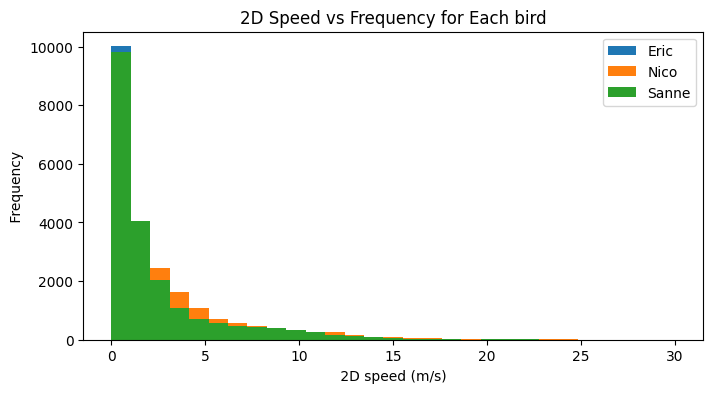

In [95]:
plt.figure(figsize = (8,4))

for bird_name in bird_names:
    ix = df.bird_name == bird_name
    speed = df.speed_2d[ix]
    ind = np.isnan(speed) 
    plt.hist(speed[~ind], bins = np.linspace(0,30,30), label=bird_name ,stacked=True) 
plt.title('2D Speed vs Frequency for Each bird')
plt.xlabel(" 2D speed (m/s) ") 
plt.ylabel(" Frequency ") 
plt.legend()
plt.show() 

# Visualize the time required by the gulls to cover equal distances over the journey

In [107]:
print(len(df))
df

61920


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
...,...,...,...,...,...,...,...,...
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


Extracting date-time column and converting to readble form

In [112]:
import datetime

timestamps = []
for i in range(len(df)):
    dt = datetime.datetime.strptime(df.date_time.iloc[i][:-3], "%Y-%m-%d %H:%M:%S")
    timestamps.append(dt)

Adding above extracted list as a new column in dataframe

In [113]:
df['timestamps'] = pd.Series(timestamps, index = df.index)
df

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


Extracting time rows for Eric

In [143]:
times = df.timestamps[df.bird_name == 'Eric']
print(times[:3])

0   2013-08-15 00:18:08
1   2013-08-15 00:48:07
2   2013-08-15 01:17:58
Name: timestamps, dtype: datetime64[ns]


In [144]:
elapsed_time = [time-times[0] for time in times]
print(elapsed_time[:3])

[Timedelta('0 days 00:00:00'), Timedelta('0 days 00:29:59'), Timedelta('0 days 00:59:50')]


In [126]:
elapsed_time[-1]

Timedelta('258 days 23:33:21')

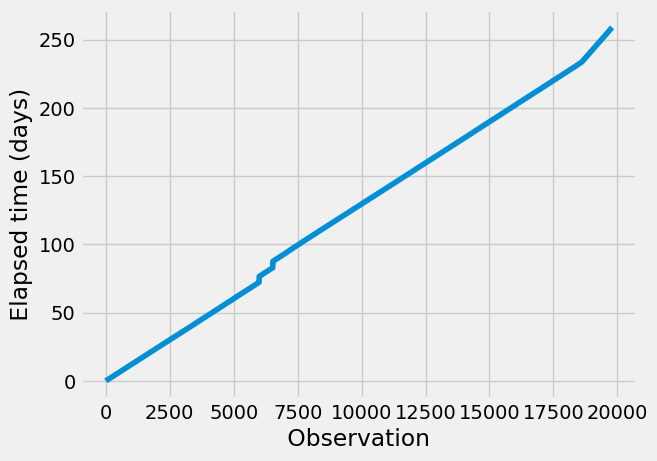

In [145]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1)) 
plt.xlabel(" Observation ") 
plt.ylabel(" Elapsed time (days) ") 
plt.show() 

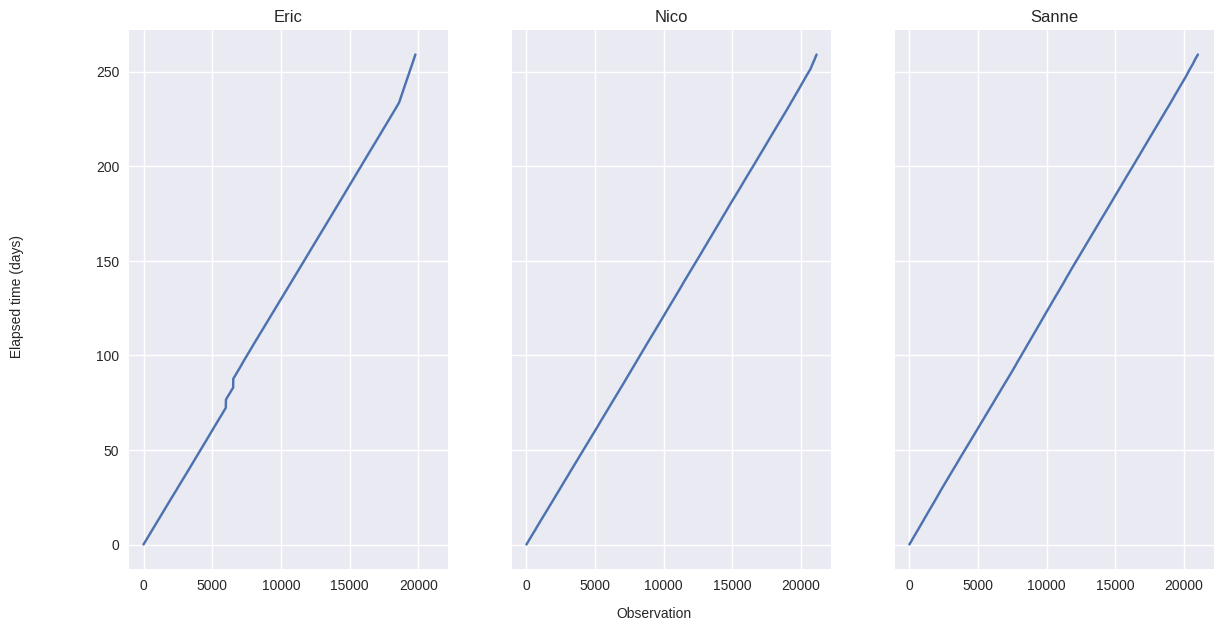

In [179]:
plt.style.use('seaborn')
colors = ['blue', 'orange', 'green']
rows_index = [0, 19795, 40916]
fig, subplot = plt.subplots(1, 3, figsize=(14,7), sharex=True, sharey=True)

for index, bird_name in enumerate(bird_names):
    times = df.timestamps[df.bird_name == bird_name]
    elapsed_time = [time- times[rows_index[index]] for time in times]
    subplot[index].plot(np.array(elapsed_time)/datetime.timedelta(days=1)) 
    subplot[index].title.set_text(bird_name)
fig.text(0.5, 0.04, 'Observation', ha='center')
fig.text(0.04, 0.5, ' Elapsed time (days) ', va='center', rotation='vertical')
plt.show()

# Visualize the daily mean speed of the gulls

In [127]:
df

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


Daily mean speed of Eric

In [186]:
data =  df[df.bird_name == "Eric"] 
times = data.timestamps
elapsed_time = [(time - times[0]) for time in times] 
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1) 
elapsed_days

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

In [187]:
next_day = 1
inds = [] 
daily_mean_speed = [] 
for (i,t) in enumerate(elapsed_days): 
    if t < next_day: 
        inds.append(i) 
    else: 
        daily_mean_speed.append(np.mean(data.speed_2d[inds])) 
        next_day += 1
        inds = []

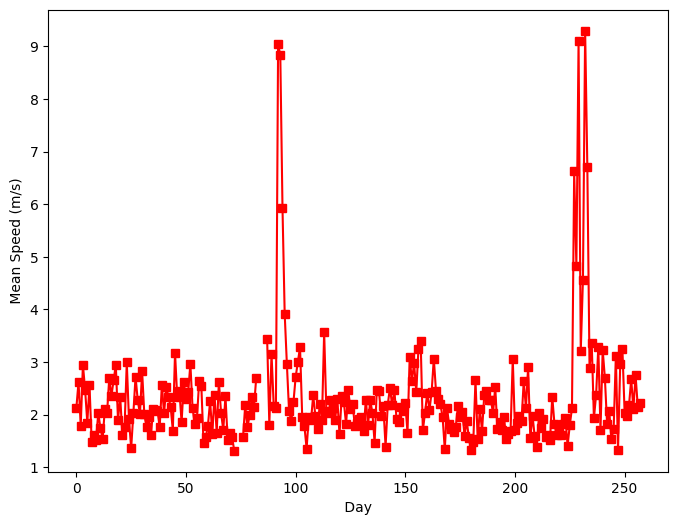

In [188]:
plt.style.use('default')
plt.figure(figsize = (8,6)) 
plt.plot(daily_mean_speed, "rs-") 
plt.xlabel(" Day ") 
plt.ylabel(" Mean Speed (m/s) "); 
plt.show() 

# Cartographic view of the journey of the gulls

In [196]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature

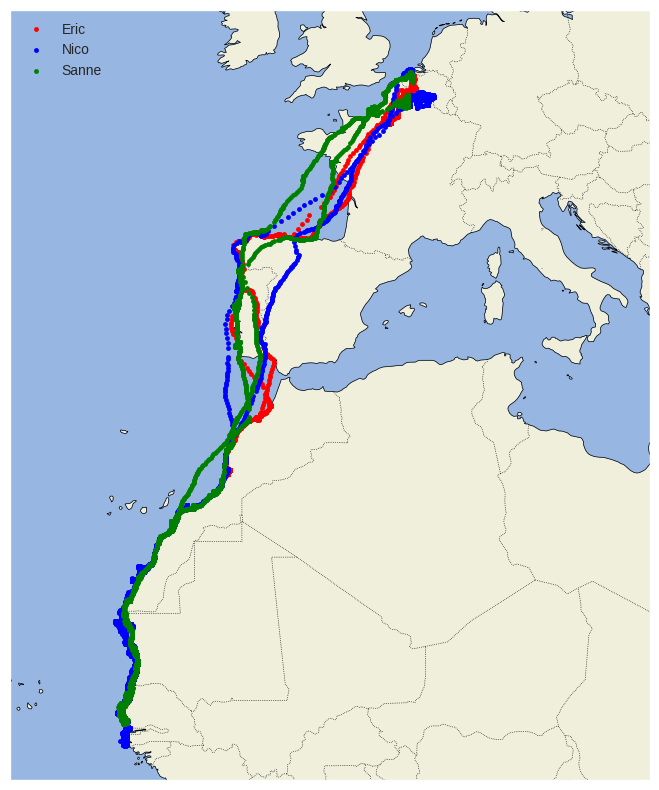

In [203]:
proj = ccrs.Mercator()  
  
colors = ['red', 'blue', 'green']
plt.style.use('ggplot')
plt.figure(figsize=(10,10)) 
ax = plt.axes(projection=proj) 
ax.set_extent((-25.0, 20.0, 52.0, 10.0)) 
ax.add_feature(cfeature.LAND) 
ax.add_feature(cfeature.OCEAN) 
ax.add_feature(cfeature.COASTLINE) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
for index, name in enumerate(bird_names): 
    ix = df['bird_name'] == name 
    x,y = df.longitude[ix], df.latitude[ix] 
    ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=name, color=colors[index]) 
plt.legend(loc="upper left") 
plt.show() 

That's it